<a href="https://colab.research.google.com/github/Radityaz/2025_AI_TI1B/blob/main/RikoAdityaZaki_AI_09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SVM DAN NAÏVE BAYES

## IMPORT LIBRARY

In [7]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score
from matplotlib.colors import ListedColormap
import numpy as np

## LATIHAN

### Percobaan 1 : Implementasi Support Vector Machine (SVM)

In [4]:
df = pd.read_csv('diabetes.csv')
df.head()
X = df[df.columns[:8]]  # Kolom fitur
y = df['Outcome']       # Kolom label

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


clf = SVC()
clf.fit(X_train, y_train)

clf.score(X_test, y_test)

0.7519685039370079

### Percobaan 2 : Implementasi Support Vector Regression (SVR)

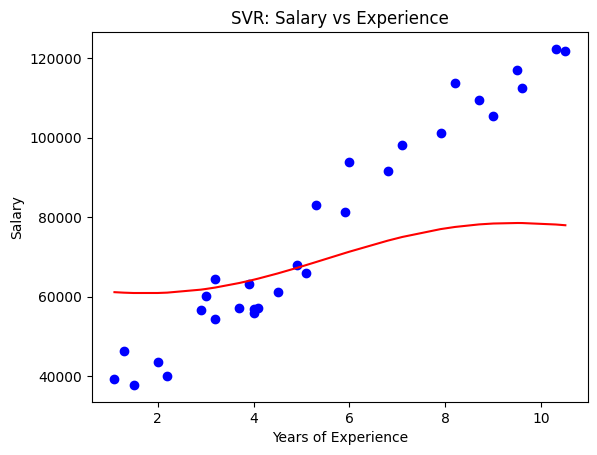

In [6]:
data = pd.read_csv('Salary_Data.csv')
data.head()
X = data['YearsExperience'].values.reshape(-1, 1)
y = data['Salary'].values

model = SVR(C=1000, gamma=0.05, kernel='rbf')
model.fit(X, y)


plt.scatter(X, y, color='blue')
plt.plot(X, model.predict(X), color='red')
plt.title('SVR: Salary vs Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

### Percobaan 3: Implementasi Naïve Bayes

Akurasi: 87.5%
Confusion Matrix: [[52  4]
 [ 6 18]]


<ipython-input-20-292153479>:29: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


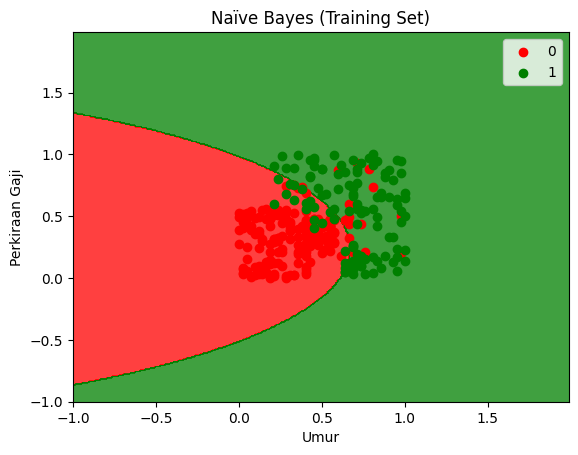

In [20]:
dataset = pd.read_csv('iklan_sosmed.csv', delimiter=';')
dataset.head()
X = dataset.iloc[:, 2:-1]  # Kolom umur dan gaji
y = dataset.iloc[:, -1]    # Kolom label (Transaksi)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

classifier = GaussianNB()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
print(f"Akurasi: {acc * 100}%")
print("Confusion Matrix:", cm)


X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j)
plt.title('Naïve Bayes (Training Set)')
plt.xlabel('Umur')
plt.ylabel('Perkiraan Gaji')
plt.legend()
plt.show()

## TUGAS PRAKTIKUM

### implementasi algoritma SVM dan SVR anda telah mendapatkan nilai akurasi dari model.

A. Optimasi SVM (Percobaan 1 - Dataset Diabetes)

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid = {
    'C': [0.1, 1, 10, 100],           # Parameter regularisasi
    'gamma': [0.01, 0.1, 1, 'scale'],  # Koefisien kernel RBF
    'kernel': ['rbf', 'linear']         # Jenis kernel
}

grid_search = GridSearchCV(
    estimator=SVC(),
    param_grid=param_grid,
    cv=5,                              # 5-fold cross-validation
    scoring='accuracy',                # Metric evaluasi
    verbose=1                          # Tampilkan progress
)

grid_search.fit(X_train, y_train)
print("Parameter Terbaik:", grid_search.best_params_)
print("Akurasi Terbaik:", grid_search.best_score_)

# Gunakan model terbaik untuk prediksi
best_svm = grid_search.best_estimator_
accuracy = best_svm.score(X_test, y_test)
print(f"Akurasi pada Data Test: {accuracy * 100:.2f}%")

Fitting 5 folds for each of 32 candidates, totalling 160 fits
Parameter Terbaik: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Akurasi Terbaik: 0.909375
Akurasi pada Data Test: 90.00%


Optimasi SVR (Percobaan 2 - Dataset Salary)

In [ ]:
from sklearn.svm import SVR

param_grid = {
    'C': [100, 1000, 5000],       # Parameter regularisasi
    'gamma': [0.01, 0.05, 0.1],    # Koefisien kernel
    'kernel': ['rbf', 'linear']     # Jenis kernel
}
grid_search = GridSearchCV(
    estimator=SVR(),
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',  # Metric untuk regresi
    verbose=1
)
grid_search.fit(X, y)  # X = YearsExperience, y = Salary
print("Parameter Terbaik:", grid_search.best_params_)
best_svr = grid_search.best_estimator_

# Visualisasi hasil prediksi
plt.scatter(X, y, color='blue')
plt.plot(X, best_svr.predict(X), color='red')
plt.title('SVR dengan Parameter Terbaik')
plt.show()

Fitting 5 folds for each of 18 candidates, totalling 90 fits
